In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import collections

In [ ]:
df = pd.read_csv('/content/drive/My Drive/food_project/RAW_recipes.csv')
df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [ ]:
df[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = df.nutrition.str.split(",",expand=True) 
df['calories'] =  df['calories'].apply(lambda x: x.replace('[','')) 
df['carbohydrates (PDV)'] =  df['carbohydrates (PDV)'].apply(lambda x: x.replace(']','')) 
df[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = \
df[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']].astype('float')

In [ ]:
df.drop(['contributor_id','submitted','nutrition'], axis=1,inplace = True)

In [ ]:
df.head()

,name,id,minutes,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,arriba baked winter squash mexican style,137739,55,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


In [ ]:
for i in df['tags'].index:
    items = df['tags'][i].split(",")
    items[0] = items[0][2:-1]
    items[len(items)-1] = items[len(items)-1][2:-2]
    for i in range(1,len(items)-1):
        items[i] = items[i][2:-1]
    for item in items:
        if(item not in list(df.columns)):
            df[item] = np.nan
            df[item][i] = 1
        else:
            df[item][i] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
df = df.fillna(0)

In [ ]:
#Remove the one that is in 'ingredients'
for i in df.index:
  for item in list(df.columns):
    if item in df['ingredients'][i] and item != 'vegetarian':
      df.drop(item, axis=1, inplace=True)

df.head()

,name,minutes,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),60-minutes-or-less,time-to-make,course,main-ingredient,cuisine,preparation,occasion,north-american,side-dishes,easy,holiday-event,vegetarian,dietary,christmas,seasonal,30-minutes-or-less,main-dish,kid-friendly,northeastern-united-states,equipment,crock-pot-slow-cooker,4-hours-or-less,eggs-dairy,dinner-party,stove-top,...,pasta-salad,pasta-elbow-macaroni,namibian,mushroom-soup,beef-barley-soup,pork-crock-pot,crock-pot-main-dish,desserts-fruit,desserts-easy,lasagne,laotian,prepared-potatoes,middle-eastern-main-dish,high-in-something-diabetic-friendly,dips-summer,black-bean-soup,bean-soup,served-hot-new-years,ham-and-bean-soup,lamb-sheep-main-dish,mongolian,for-large-groups-holiday-event,stews-poultry,pasta-rice-and-grains-elbow-macaroni,pork-loin,cranberry-sauce,marinara-sauce,breakfast-casseroles,breakfast-potatoes,main-dish-seafood,shrimp-main-dish,pumpkin-bread,bread-pudding,ss_thansql:name_topics_of_recipegreater_tha,chicken-crock-pot,chicken-stews,chicken-stew,row the ultimate fiesta with this sopaipillas recipe from Food.com,roast-beef-main-dish,roast-beef-comfort-food
0,arriba baked winter squash mexican style,55,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,a bit different breakfast pizza,30,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,all in the kitchen chili,130,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,alouette potatoes,45,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,amish tomato ketchup for canning,190,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Remove the columns with more than two dash or include colon
for item in list(df.columns):
  time = 0
  for ch in item:
     if ch == '-':
       time += 1
  if time > 2:
    df.drop(item, axis=1, inplace=True)
  elif ':' in item:
    df.drop(item, axis=1, inplace=True)


In [ ]:
df.columns
for item in list(df.columns):
  if len(item) > 25: #Remove item with long name (greater than 25)
    df.drop(item, axis=1, inplace=True)


In [ ]:
#Remove column with tags that only belongs to one dish
for item in list(df.columns)[15:]:
  if df[item].sum() == 1.0:
    df.drop(item, axis=1, inplace=True)
  

In [ ]:
df.head()

,name,minutes,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV),time-to-make,course,main-ingredient,cuisine,preparation,occasion,north-american,side-dishes,easy,holiday-event,vegetarian,dietary,christmas,seasonal,main-dish,kid-friendly,equipment,eggs-dairy,dinner-party,stove-top,new-years,thanksgiving,independence-day,st-patricks-day,valentines-day,...,vietnamese,palestinian,norwegian,main-dish-beef,hunan,austrian,halloween-cocktails,libyan,april-fools-day,beef-organ-meats,beef-liver,angolan,whole-duck,halloween-cupcakes,halloween-cakes,ragu-recipe-contest,macaroni-and-cheese,beijing,pickeral,main-dish-chicken,brewing,cambodian,beef-kidney,spaghetti-sauce,pot-pie,dips-lunch-snacks,pressure-canning,main-dish-pork,quiche,sugar-cookies,venezuelan,side-dishes-beans,beans-side-dishes,duck-breasts,pasta-salad,pasta-elbow-macaroni,namibian,laotian,prepared-potatoes,mongolian
0,arriba baked winter squash mexican style,55,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,a bit different breakfast pizza,30,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,all in the kitchen chili,130,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,alouette potatoes,45,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,amish tomato ketchup for canning,190,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
record = {}
for item in list(df.columns)[16:]:
  record[item] = df[item].sum()
  

In [ ]:
df2 = pd.DataFrame.from_dict(record, orient= 'index')

In [ ]:
df2.describe()

,0
count,278.000000
mean,37.492806
std,16.759876
min,2.000000
25%,27.000000
50%,38.500000
75%,49.000000
max,102.000000


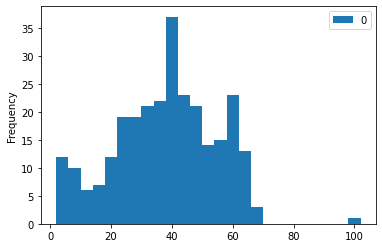

In [ ]:
df2.plot(kind='hist', bins = 25)

In [ ]:
25.750000-16.730008

9.019991999999998

In [ ]:
for item in list(df.columns)[12:]:
  count  = df[item].sum()
  if count < 9:
    df.drop(item, axis=1, inplace=True)

In [ ]:
list1 = list(df.columns)
list1


['name',
 'minutes',
 'tags',
 'n_steps',
 'steps',
 'description',
 'ingredients',
 'n_ingredients',
 'calories',
 'total fat (PDV)',
 'sugar (PDV)',
 'sodium (PDV)',
 'protein (PDV)',
 'saturated fat (PDV)',
 'carbohydrates (PDV)',
 'time-to-make',
 'course',
 'main-ingredient',
 'cuisine',
 'preparation',
 'occasion',
 'north-american',
 'side-dishes',
 'easy',
 'holiday-event',
 'vegetarian',
 'dietary',
 'christmas',
 'seasonal',
 'main-dish',
 'kid-friendly',
 'equipment',
 'eggs-dairy',
 'dinner-party',
 'stove-top',
 'new-years',
 'thanksgiving',
 'independence-day',
 'st-patricks-day',
 'valentines-day',
 'inexpensive',
 'brunch',
 'superbowl',
 'presentation',
 'served-hot',
 'weeknight',
 'condiments-etc',
 'heirloom-historical',
 'amish-mennonite',
 'number-of-servings',
 'technique',
 'low-protein',
 'shakes',
 'low-in-something',
 'served-cold',
 'appetizers',
 'south-west-pacific',
 'copycat',
 'pork-ribs',
 'super-bowl',
 'novelty',
 'taste-mood',
 'pies-and-tarts',
 'd

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('tags').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# Convert to a DataFrame and render.
df3 = pd.DataFrame.from_records(rows)


df3.head()

,0,1
0,occasion,superbowl
1,equipment,super-bowl
2,eggs-dairy,
3,stove-top,
4,inexpensive,


In [ ]:
for item in list(df3[0]):
  if item in list(df.columns):
    df.drop(item, axis=1, inplace=True)

for item in list(df3[1]):
   if item in list(df.columns):
      df.drop(item, axis=1, inplace=True)

In [ ]:
list(df.columns)

In [ ]:


print("Welcome to food recipe recommender")

print("Choose two options 1.name 2.recommender\n 1.type the name of the you would like to cook \n 2.recipe chosen by questions\n choose by typing 1 or 2")

inputs = input()

if 1 == int(inputs):
  print("type the general name of the food you like to cook ex.kebab")
  name = input()

  include = []
  for i in df.index:
    if name in str(df['name'][i]):
      include.append(i)

  filter_df  = df.iloc[include]

  filter_df.reset_index(drop=True, inplace=True)
  
  print("Please provide availble ingredients you have in this form ex. beef,cheese,egg")

  x = input()

  ing_list = x.split(",")

  ing_index = []
  for i in filter_df.index:
    for item in ing_list:
      if item in filter_df['ingredients'][i] and i not in ing_index:
        ing_index.append(i)

  filter_df=filter_df.iloc[ing_index]

  filter_df.reset_index(drop=True, inplace=True)

  print("Type the number if there is a recipe of your choice if not type next")

  inputs = 'next'
  number = 0
  
  while inputs == 'next' and number < len(filter_df):
      number +=5
      
      for i in range(number-5, number):
        print("{}.{}:{}\n".format(i,filter_df['name'][i], filter_df['description'][i]))

      inputs = input()
  
  if inputs == 'next':
    inputs = len(df)+1

  x = int(inputs)

  if x > len(filter_df):
    print("redo process")
  else:
    print("{}\n{}\n{}\n".format(filter_df['name'][x], filter_df['ingredients'][x], filter_df['steps'][x]))  

else:
  print('Vegetarian? yes or no')
  x = input()
  if x == 'yes':
    first = 1.0
  else:
    first = 0
  print("dessert? yes or no")
  x = input()
  if x == 'yes':
    second = 1.0
  else:
    second = 0
  df_filtered = df[(df['vegetarian'] == first) & (df['desserts'] == second)]
  
  df_filtered.reset_index(drop=True, inplace=True)

  print("Please provide availble ingredients you have in this form ex. beef,cheese,egg")

  x = input()

  ing_list = x.split(",")

  ing_index = []

  for i in df_filtered.index:
    for item in ing_list:
      if item in df_filtered['ingredients'][i] and i not in ing_index:
        ing_index.append(i)

  df_filtered = df_filtered.iloc[ing_index]

  while len(df_filtered) > 20:

    filter = list(df_filtered)[15]
    max = df_filtered[filter].sum()
    for col in list(df_filtered)[15:]:
      if df_filtered[col].sum() > max:
        filter = col
        max = df_filtered[col].sum()

    print("{}? yes or no".format(filter))

    x = input()

    if x == 'yes':
      num = 1.0
    else:
      num = 0
    
    df_filtered = df_filtered.loc[df_filtered[filter] == num]
    df_filtered.drop(str(filter), axis=1, inplace=True)

  df_filtered.reset_index(drop=True, inplace=True)

  print("Type the number if there is a recipe of your choice if not type next")

  inputs = 'next'
  number = 0
  while inputs == 'next' and number < 20:

      if number+5 < len(df_filtered):
        number +=5
      else:
        number = len(df_filtered)

      for i in range(number-5, number):
        print("{}.{}:{}\n".format(i,df_filtered['name'][i], df_filtered['description'][i]))

      inputs = input()
  

  if inputs == 'next':
    inputs =21

  number = int(inputs)

  if number == 21:
    print("redo process")
  else:
    print("{}\n{}\n{}\n".format(df_filtered['name'][number], df_filtered['ingredients'][number], df_filtered['steps'][number]))